# Artificial Intelligence Based Multi-Class Brain Tumor Classification from MRI Imaging Data

In [1]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from skimage import io, transform
from sklearn import preprocessing
import numpy as np
import joblib
import cv2

In [2]:
path = r"Dataset"
model_folder = "model"
categories = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
categories


['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [3]:
X_file = os.path.join(model_folder, "X.txt.npy")
Y_file = os.path.join(model_folder, "Y.txt.npy")
if os.path.exists(X_file) and os.path.exists(Y_file):
    X = np.load(X_file)
    Y = np.load(Y_file)
    print("X and Y arrays loaded successfully.")
else:
    X = [] # input array
    Y = [] # output array
    for root, dirs, directory in os.walk(path):
        for j in range(len(directory)):
            name = os.path.basename(root)
            print(f'Loading category: {dirs}')
            print(name+" "+root+"/"+directory[j])
            if 'Thumbs.db' not in directory[j]:
                img_array = cv2.imread(root+"/"+directory[j])
                img_resized = resize(img_array, (64, 64, 3))
                # Append the input image array to X
                X.append(img_resized.flatten())
                # Append the index of the category in categories list to Y
                Y.append(categories.index(name))
    X = np.array(X)
    Y = np.array(Y)
    np.save(X_file, X)
    np.save(Y_file, Y)

X and Y arrays loaded successfully.


In [4]:
# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=77)

In [5]:
labels=categories

In [6]:
#defining global variables to store accuracy and other metrics
precision = []
recall = []
fscore = []
accuracy = []

In [7]:
#function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, predict, testY):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

# Support Vector Machine Classifier


Model loaded successfully.
Support Vector Machine Classifier Accuracy    : 82.57839721254355
Support Vector Machine Classifier Precision   : 82.49771590622655
Support Vector Machine Classifier Recall      : 81.38833042183035
Support Vector Machine Classifier FSCORE      : 81.72716134785018

 Support Vector Machine Classifier classification report
                   precision    recall  f1-score   support

    glioma_tumor       0.86      0.85      0.85       259
meningioma_tumor       0.74      0.74      0.74       250
        no_tumor       0.67      0.81      0.73       117
 pituitary_tumor       0.99      0.91      0.94       235

        accuracy                           0.83       861
       macro avg       0.81      0.82      0.82       861
    weighted avg       0.83      0.83      0.83       861



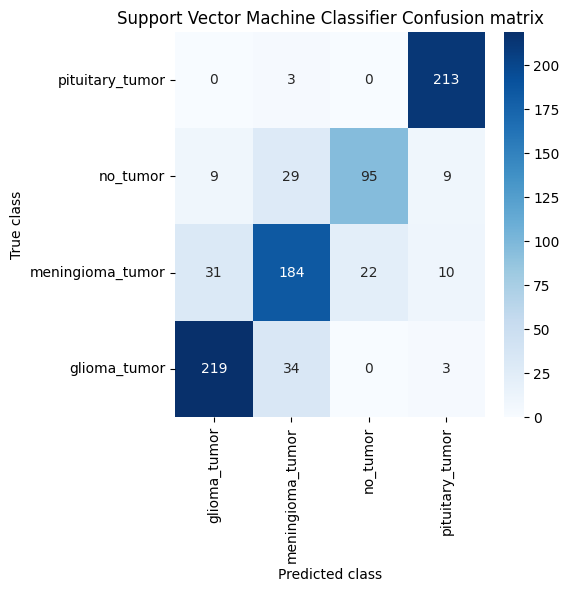

In [8]:
if os.path.exists('SVM_model.pkl'):
    # Load the trained model from the file
    clf = joblib.load('SVM_model.pkl')
    print("Model loaded successfully.")
    predict = clf.predict(x_test)
    calculateMetrics("Support Vector Machine Classifier", predict, y_test)
else:
    # Train the model (assuming X_train and y_train are defined)
    clf =SVC(kernel='poly', C=1.0, gamma='scale', random_state=42,)
    clf.fit(x_train, y_train)
    # Save the trained model to a file
    joblib.dump(clf, 'SVM_model.pkl')
    print("Model saved successfully.")
    predict = clf.predict(x_test)
    calculateMetrics("Support Vector Machineclassifier", predict, y_test)

# RandomForestClassifier

RandomForestClassifier Accuracy    : 92.33449477351915
RandomForestClassifier Precision   : 92.05643220199008
RandomForestClassifier Recall      : 93.00168384067337
RandomForestClassifier FSCORE      : 92.42071450125553

 RandomForestClassifier classification report
                   precision    recall  f1-score   support

    glioma_tumor       0.89      0.97      0.93       234
meningioma_tumor       0.88      0.87      0.88       249
        no_tumor       0.96      0.87      0.92       157
 pituitary_tumor       0.99      0.96      0.97       221

        accuracy                           0.92       861
       macro avg       0.93      0.92      0.92       861
    weighted avg       0.93      0.92      0.92       861



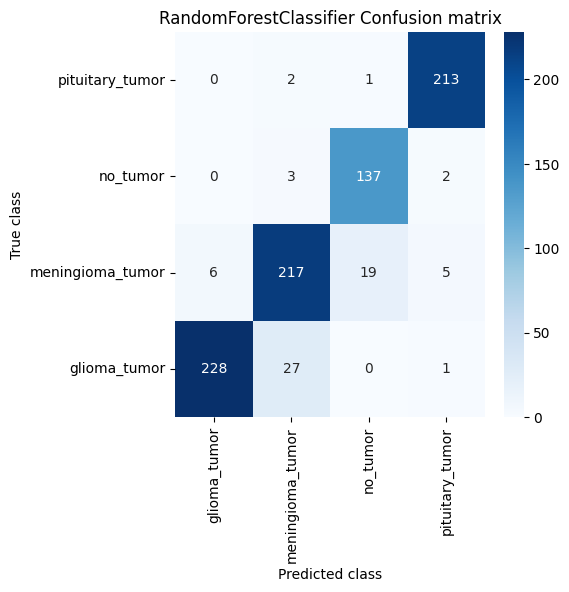

In [9]:
# Check if the pkl file exists
Model_file = os.path.join(model_folder, "RFC_Model.pkl")
if os.path.exists(Model_file):
    # Load the model from the pkl file
    rf_classifier = joblib.load(Model_file)
    predict = rf_classifier.predict(x_test)
    calculateMetrics("RandomForestClassifier", predict, y_test)
else:
    
    # Create Random Forest Classifier with Decision Tree as base estimator
    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(x_train, y_train)
    # Save the model weights to a pkl file
    joblib.dump(rf_classifier, Model_file)  
    predict = rf_classifier.predict(x_test)
    print("Random Forest model trained and model weights saved.")
    calculateMetrics("RandomForestClassifier", predict, y_test)
    

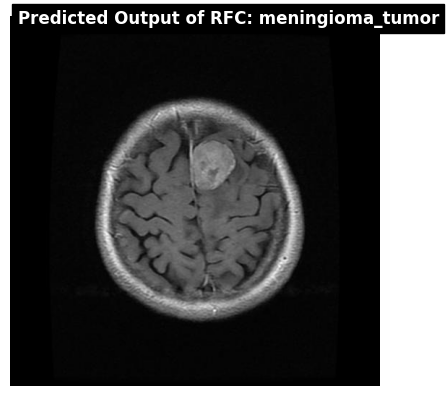

In [11]:
path=r"H:\SMEC 2 (EC)\B Sec\B16 Multiclass brain tumor\Dataset\meningioma_tumor\m (2).jpg"
#path=r""
img=imread(path)
img_resize=resize(img,(64,64,3))
img_preprocessed=[img_resize.flatten()]
output_number=rf_classifier.predict(img_preprocessed)[0]
output_name=categories[output_number]

plt.imshow(img)
plt.text(10, 10, f'Predicted Output of RFC: {output_name}', color='white', fontsize=12, weight='bold', backgroundcolor='black')
plt.axis('off')
plt.show()